<center>

# Aprendizaje No Supervisado DiploDatos 2025
## Georgina Flesia y Laura Alonso Alemany


## Agrupamiento con el FIFA 2019 dataset

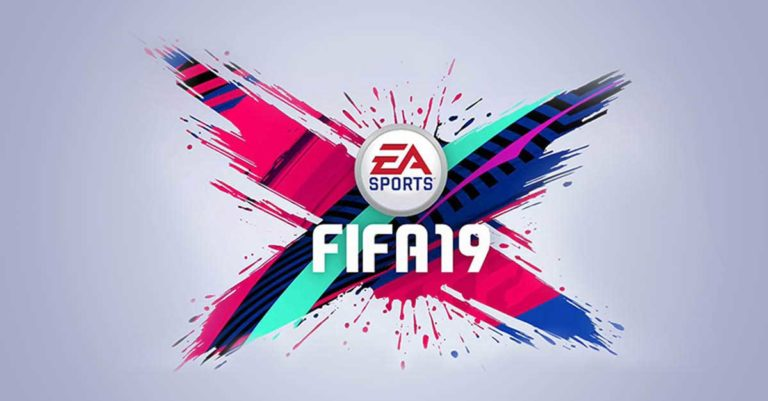
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

# Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

# 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'.

In [ ]:
url='https://raw.githubusercontent.com/DiploDatos/AprendizajeNOSupervisado/master/2021/data.csv'

In [ ]:
df=pd.read_csv(url)

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall") y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [ ]:
n=10000
df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['Overall']>70)] # mejores jugadores

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
                  'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
                  'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                  'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                  'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

print(len(skills_ratings), 'variables numéricas: skills/habilidades')

df_skills=df_n[skills_ratings]

34 variables numéricas: skills/habilidades


# 2.Lista de atributos con comentario

**Name, Age, Nationality**: player's name, age and nationality, respectively.

**Overall**: overall rating for the player

**Club**: player's club

**Value**: market value of the player

**Wage**: player's wage in a monthly basis

**Position**: natural position of the player

**Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys**: attacking attributes

**Dribbling, Curve, FKAccuracy, LongPassing, BallControl**: skill attributes

A**cceleration, SprintSpeed, Agility, Reactions, Balance**: movement attributes

**ShotPower, Jumping, Stamina, Strength, LongShots**: power attributes

**Aggression, Interceptions, Positioning, Vision, Penalties, Composure**: mentality attributes

**Marking, StandingTackle, SlidingTackle**: defending attributes

**GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes**: goalkeeping attributes

**Crossing**: Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.

**Finishing**: Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack by scoring a goal.

**HeadingAccuracy**: Player’s accuracy to pass or shoot by using his head rated between 1-99.

**ShortPassing**: Player’s accuracy for short passes rated between 1-99.

**LongPassing**: Player’s accuracy for long passes rated between 1-99.

**Dribbling**: Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while moving in one particular direction.

**SprintSpeed**: Speed rate of the player rated between 1-99.

**Acceleration**: Shows how fast a player can reach his maximum sprint speed rated between 1-99.

**FKAccuracy**: Player’s accuracy to score free kick goals rated between 1-99.

**BallControl**: Player’s ability to control the ball rated between 1-99.

**Balance**: Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

**ShotPower**: Player’s strength level of shooting the ball rated between 1-99.

**Jumping**: Player’s jumping skill rated between 1-99.

**Penalties**: Player’s accuracy to score goals from penalty rated between 1-99.

**Strength**: Physical strength of the player rated between 1-99.

**Agility**: Gracefulness and quickness of the player while controlling the ball rated between 1-99.

**Reactions**: Acting speed of the player to what happens in his environment rated between 1-99.

**Aggression**: Aggression level of the player while pushing, pulling and tackling rated between 1-99.

**Positioning**: Player’s ability to place himself in the right position to receive the ball or score goals rated between 1-99.

**Vision**: Player’s mental awareness about the other players in the team for passing rated between 1-99.

**Volleys**: Player’s ability to perform volleys rated between 1-99.
LongShots: Player’s accuracy of shoots from long distances rated between 1-99.

**Stamina**: Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower stamina get tired fast.

**Composure**: Player’s ability to control his calmness and frustration during the match rated between 1-99.

**Curve**: Player’s ability to curve the ball while passing or shooting rated between 1-99.

**Interceptions**: Player’s ability to intercept the ball while opposite team’s players are passing rated between 1-99. It is a defensive skill.

**StandingTackle**: Player’s ability to perform tackle (take the ball from the opposite player) while standing rated between 1-99. It is a defensive skill.

**SlidingTackle**: Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

**Marking**: Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99. It is a defensive skill.

In [ ]:
df_skills #Entrada, matriz de datos X

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,64.0,62.0,54.0,72.0,56.0,72.0,68.0,64.0,69.0,70.0,66.0,59.0,68.0,71.0,66.0,66.0,31.0,67.0,73.0,64.0,52.0,51.0,73.0,72.0,66.0,62.0,31.0,54.0,41.0,4.0,4.0,4.0,4.0,4.0
4745,69.0,57.0,59.0,73.0,57.0,71.0,69.0,59.0,69.0,73.0,78.0,79.0,74.0,69.0,76.0,63.0,78.0,84.0,76.0,67.0,71.0,59.0,69.0,69.0,59.0,69.0,63.0,59.0,55.0,9.0,9.0,8.0,6.0,7.0
4746,48.0,73.0,67.0,58.0,56.0,73.0,36.0,33.0,40.0,71.0,93.0,92.0,88.0,64.0,85.0,63.0,70.0,76.0,65.0,53.0,52.0,28.0,74.0,62.0,66.0,67.0,50.0,28.0,22.0,15.0,10.0,13.0,12.0,12.0
4747,50.0,57.0,71.0,72.0,70.0,70.0,54.0,46.0,69.0,71.0,65.0,64.0,58.0,66.0,66.0,84.0,61.0,87.0,83.0,73.0,83.0,69.0,68.0,58.0,69.0,64.0,58.0,69.0,67.0,11.0,9.0,13.0,12.0,11.0


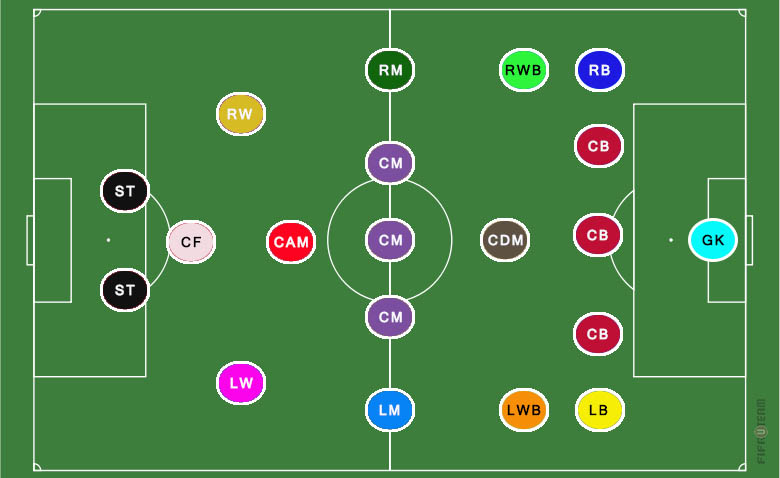

ST: Positional skill. Player’s general ability when playing in ST position rated between 1-99.

RS: Positional skill. Player’s general ability when playing in in RS position rated between 1-99.

LS: Positional skill. Player’s general ability when playing in in LS position rated between 1-99.

CF: Positional skill. Player’s general ability when playing in in CF position rated between 1-99.

RF: Positional skill. Player’s general ability when playing in in RF position rated between 1-99.

LF: Positional skill. Player’s general ability when playing in in LF position rated between 1-99.

RW: Positional skill. Player’s general ability when playing in in RW position rated between 1-99.

LW: Positional skill. Player’s general ability when playing in in LW position rated between 1-99.



# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo.


In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust,random_state=5)
km.fit(df_skills) #utiliza todas las habilidades: 34 dimensiones

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al centro de cada cluster=Inertia=  12326323.44116827


In [ ]:
df_clusters=df_n.copy()
df_clusters['kmeans_4'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')




Kmeans encontró:  4 clusters, nosotros forzamos la cantidad


**Graficamos el resultado de agrupar a los jugadores usando kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [ ]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab:
fig.show(renderer="colab")

In [ ]:
#En Jupyter:
#iplot(fig)
#plot(fig)

**ANÁLISIS**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans**
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster  
- Tabla de contingencia: alguna categórica vs clusters para ver posible asociación


In [ ]:
X=df_skills.copy()
#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]

## Coeficiente de silueta

Para n_clusters = 2 El silhouette_score promedio es : 0.6286446990945119
Para n_clusters = 3 El silhouette_score promedio es : 0.35478283696753277
Para n_clusters = 4 El silhouette_score promedio es : 0.32593031914696274
Para n_clusters = 5 El silhouette_score promedio es : 0.25170182242045525
Para n_clusters = 6 El silhouette_score promedio es : 0.23047715394358853


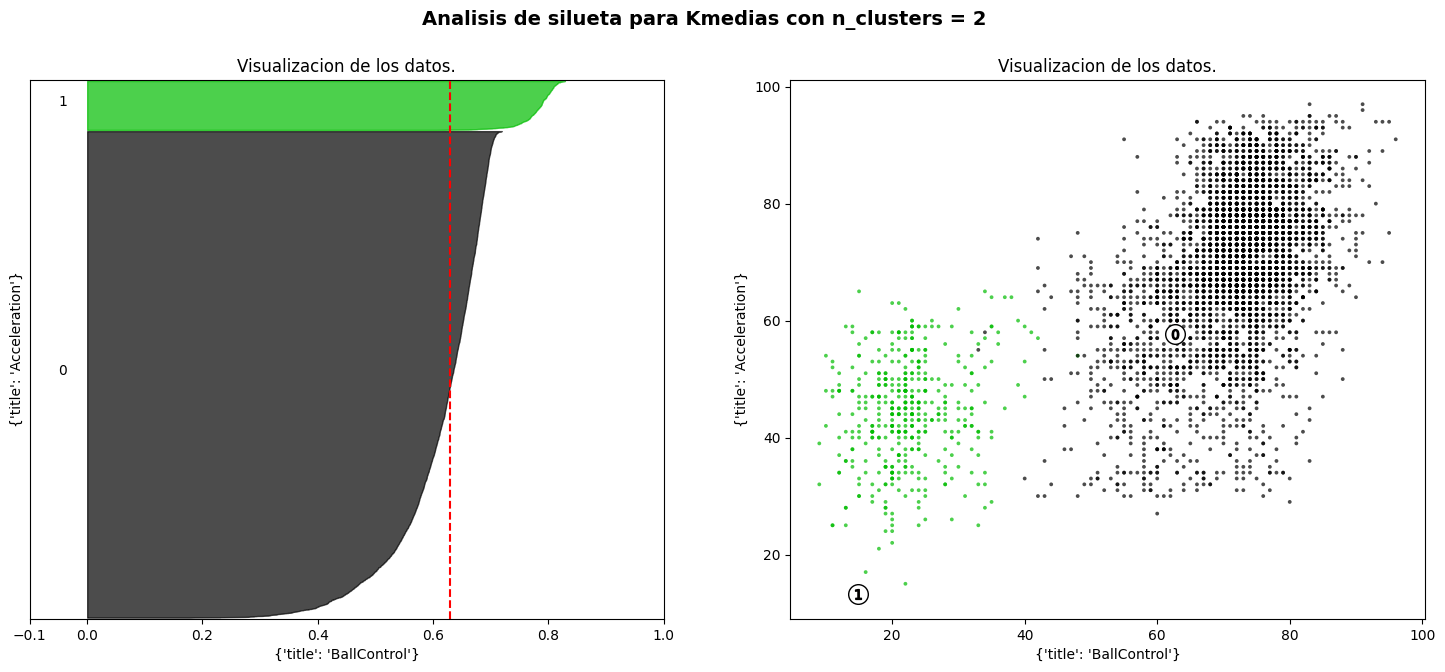

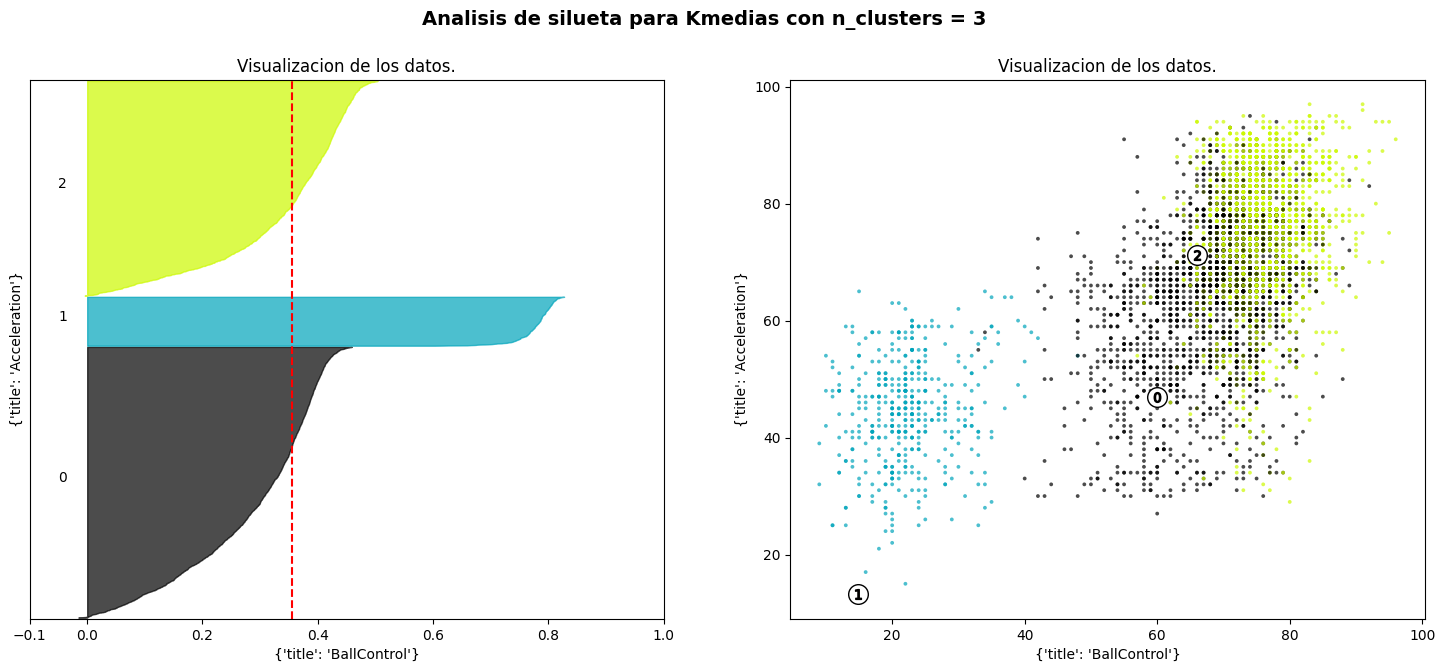

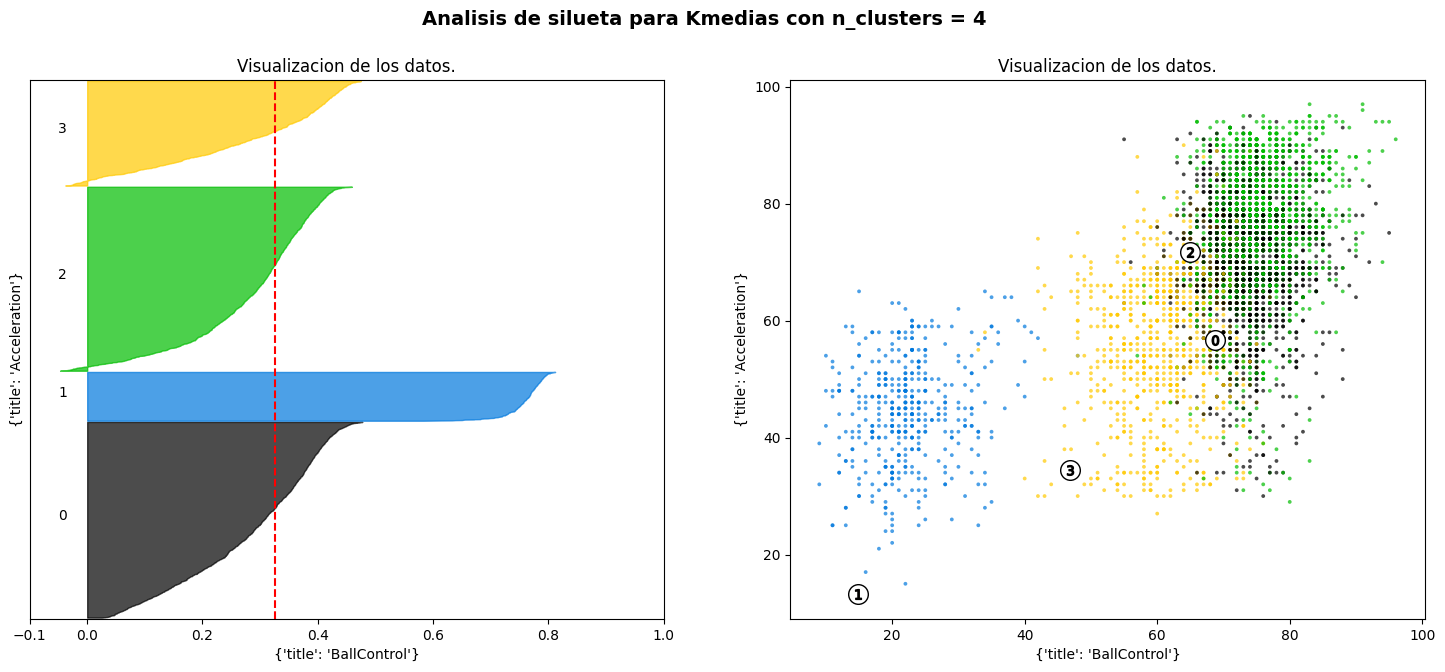

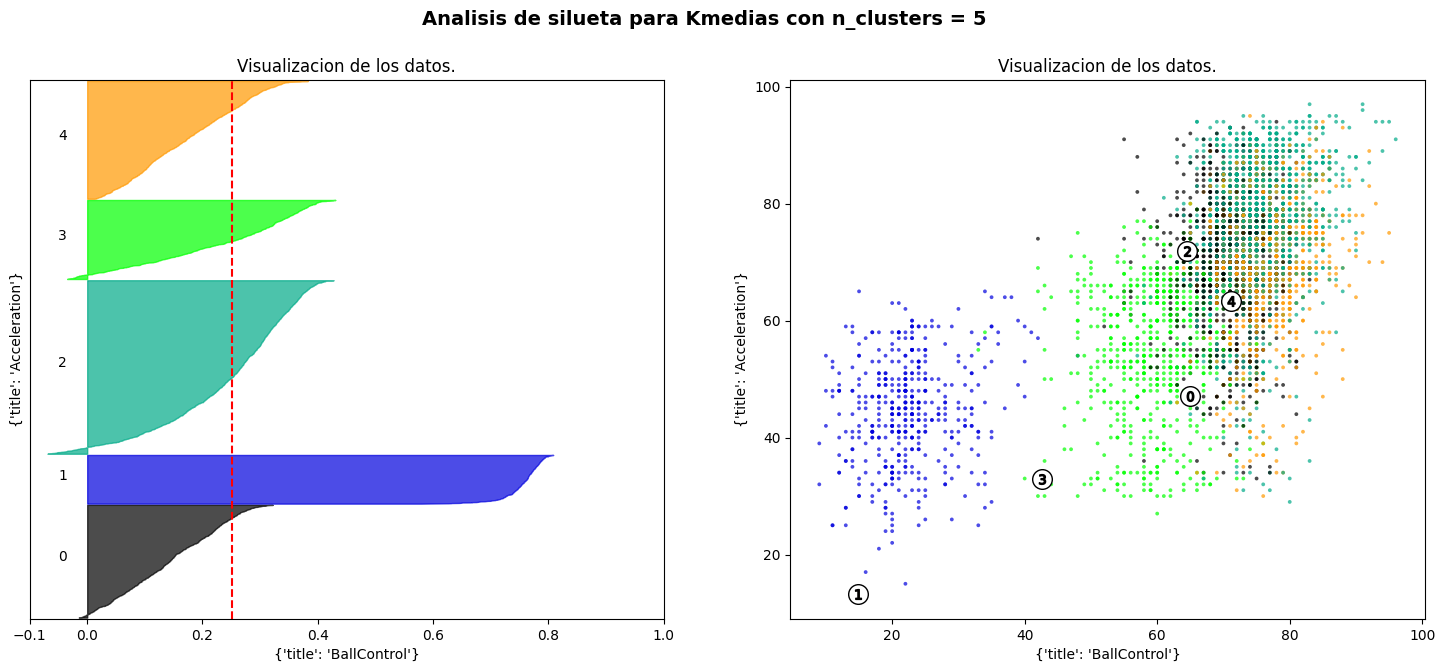

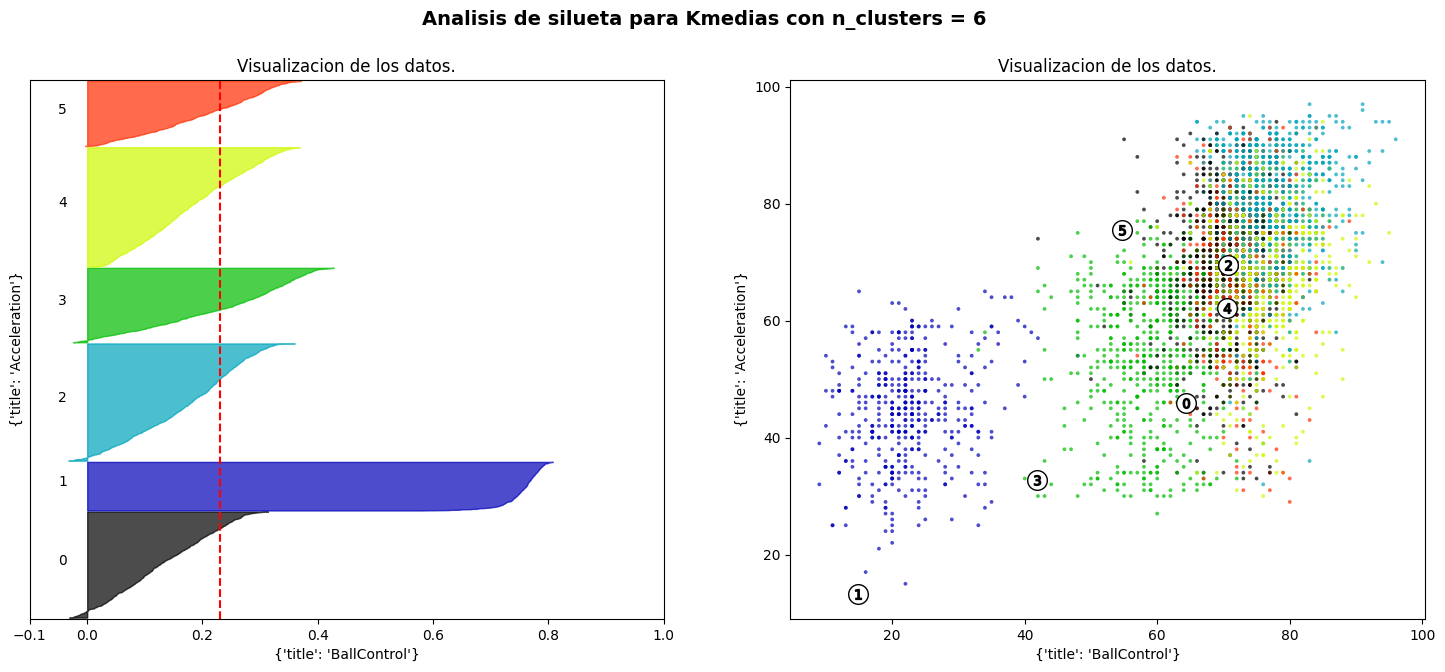

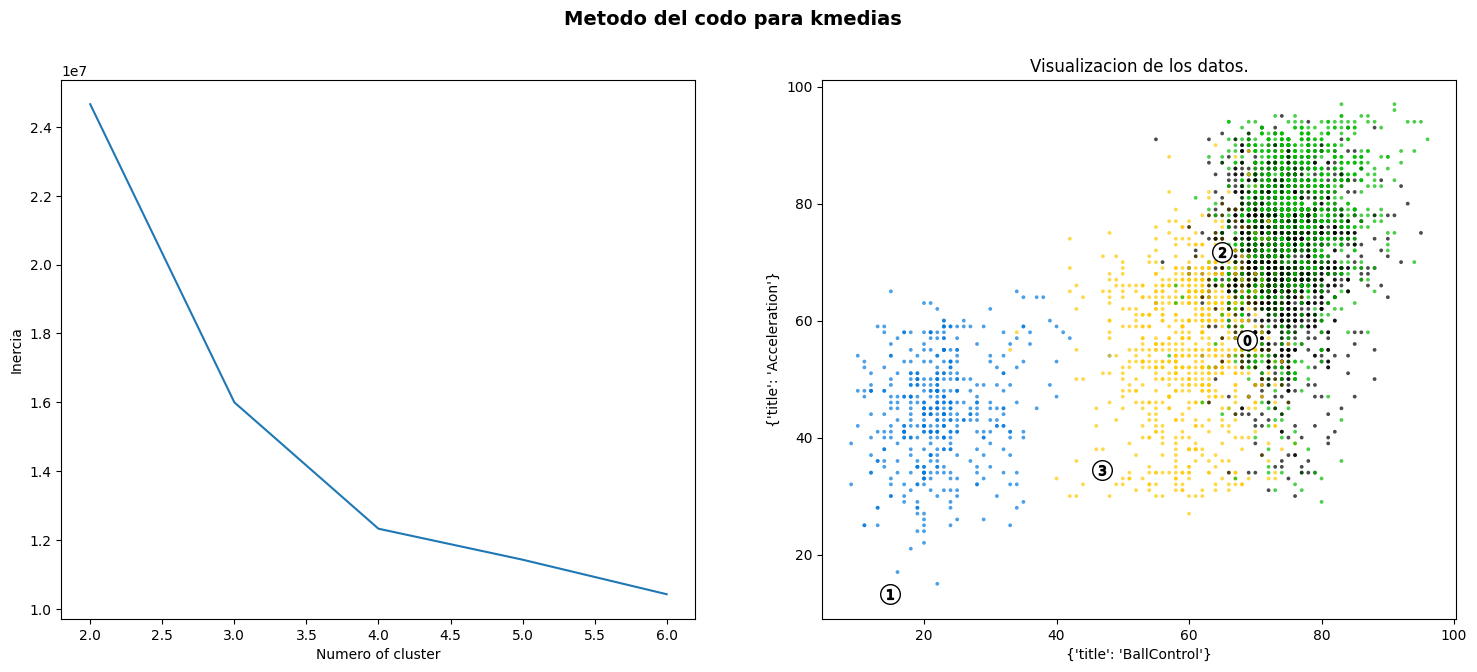

In [ ]:
# Coeficiente de silueta
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel(dict(title=skill_1))
    ax1.set_ylabel(dict(title=skill_2))

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[skill_1], X[skill_2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel(dict(title=skill_1))
    ax2.set_ylabel(dict(title=skill_2))

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax2.scatter(X[skill_1], X[skill_2], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel(dict(title=skill_1))
ax2.set_ylabel(dict(title=skill_2))

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()




Ayuda: Creamos una nueva variable categórica de la base recodificando la posición para simplificar el análisis de los resultados de clustering

In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'

    elif position in midfielders:
        return 'Midfielder'

    elif position in defenders:
        return 'Defender'

    elif position in goalkeepers:
        return 'GK'

    else:
        return 'nan'

In [ ]:
df_clusters["Position2"]=df_n["Position"].apply(lambda x: pos2(x))

df_clusters["Position2"].value_counts()



,count
Position2,
Forward,1488
Defender,1485
Midfielder,1341
GK,435


In [ ]:
labels_kmeans = km.fit_predict(df_skills)

df_clusters['Cluster'] = labels_kmeans

df_clusters['Cluster'].value_counts()


,count
Cluster,
2,1743
0,1639
3,932
1,435


<Axes: xlabel='Cluster', ylabel='count'>

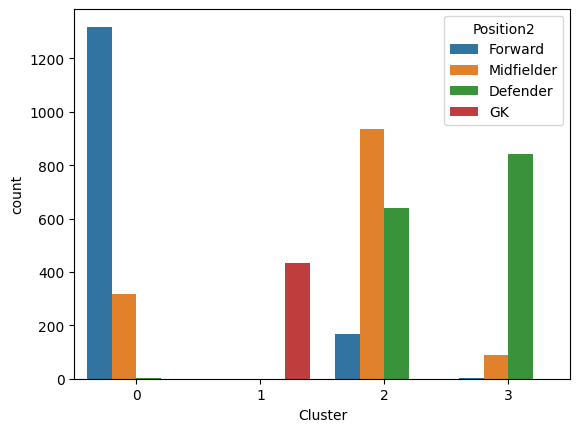

In [ ]:
sns.countplot(df_clusters,x="Cluster",hue="Position2")

In [ ]:
pd.crosstab( index=df_clusters['Cluster'],columns=df_clusters['Position2'])
#fowards 0, midfield = 1, defender = 2, GK = 3

Position2,Defender,Forward,GK,Midfielder
Cluster,,,,
0,2,1319,0,318
1,0,0,435,0
2,641,168,0,934
3,842,1,0,89


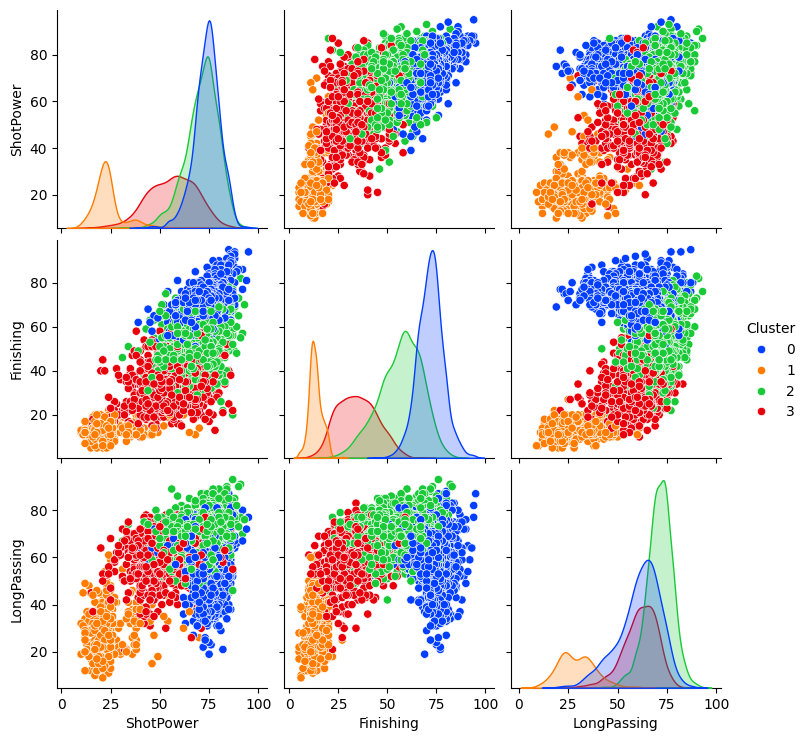

In [ ]:


data_temp = df_clusters.loc[:,['Cluster','ShotPower','Finishing','LongPassing']]


sns.pairplot(data_temp, hue="Cluster",palette='bright')

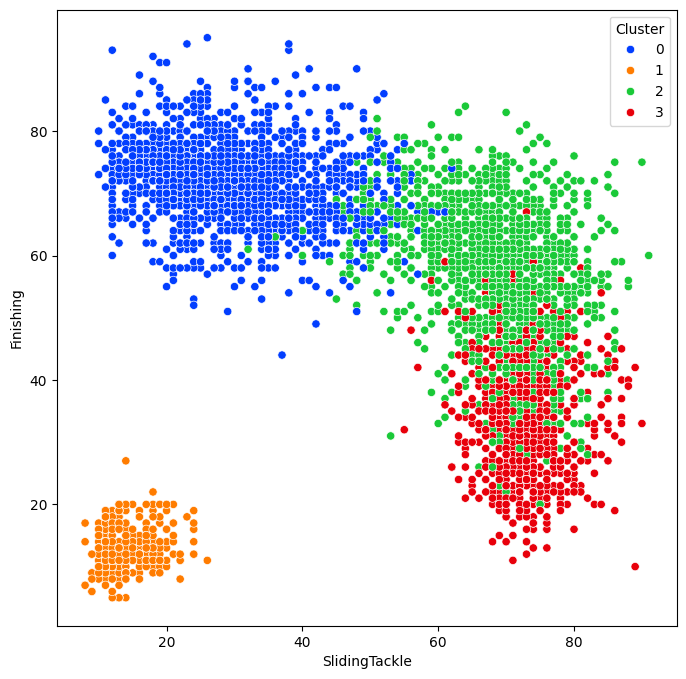

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='SlidingTackle', y='Finishing', hue='Cluster', data=df_clusters,palette='bright')
plt.show()

**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

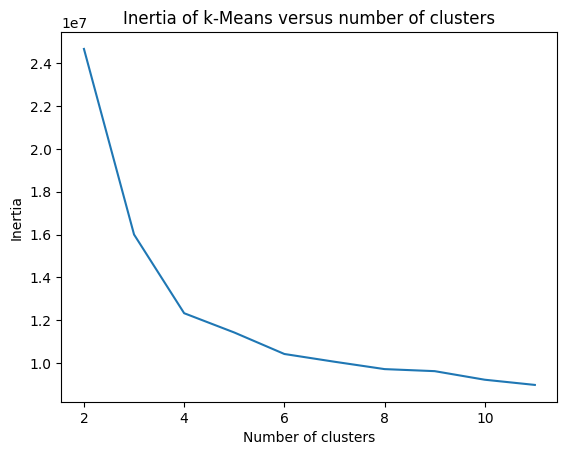

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Graficamos los resultados:

**Pregunta: normalizamos/estandarizamos la base?**

El análisis de conglomerados llamdo K-Means agrupa los datos tratando de separar muestras en un número K de grupos y minimizando un criterio conocido como inercia (suma de errores cuadrados dentro del grupo), que se basa en la distancia y que requiere que el número de grupos sea especificado.

Dado que el algoritmo K-Means se basa en la distancia, se debe aplicar alguna normalización al conjunto de datos para evitar que características de alta magnitud afecten y dominen negativamente los cálculos de dicha distancia.

 La estandarización de datos es un tipo específico de normalización de datos en el que escala los valores de las características a un rango similar. La estandarización elimina la media de cada muestra y escala los datos a la varianza unitaria. La estandarización también considera que todas las muestras para cada atributo estén distribuidas normalmente. Sin embargo, la estandarización puede verse influenciada fácilmente por valores atípicos. Cuando el conjunto de datos dado contiene valores atípicos, los resultados de la estandarización pueden ser engañosos. En este tipo de condiciones, es mejor utilizar diferentes enfoques que sean sólidos frente a valores atípicos, como la estandarización robusta que utiliza el rango intercuartil. Este método elimina la mediana y escala los datos en el rango entre el 1er cuartil y el 3er cuartil.

 Dado que el conjunto de datos de FIFA 19 contiene valores atípicos en algunas de sus características, se sugiere aplicar una estandarización robusta al conjunto de datos, porque no lo hacemos aqui? porque solo usamos skills, que ya estan en un rango comun. Si usaramos wage, deberiamos estandarizar.



**Ahora vemos que agrupamientos se pueden hacer excluyendo los arqueros**

# 4.-Clustering-con-Kmeans-subpoblación

In [ ]:

df_n2=df_n[(df_n["Position"]!='GK')&(df_n['Overall']>70)]

skills_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

df_skills2=df_n2[skills_ratings]



In [ ]:
# Número de clusters buscado
n_clust = 3

km2 = KMeans(n_clusters=n_clust)
km2.fit(df_skills2)

# Recuperacion de etiquetas
clusters2 = km2.labels_

df_clusters2=df_n2.copy()

labels_kmeans2 = km2.fit_predict(df_skills2)

df_clusters2['Cluster2'] = labels_kmeans2

df_clusters2['Cluster2'].value_counts()

,count
Cluster2,
0,1737
1,1636
2,941


In [ ]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']


def pos3(position):
    if position in forwards:
        return 'Forward'

    elif position in midfielders:
        return 'Midfielder'

    elif position in defenders:
        return 'Defender'

    else:
        return 'nan'

df_clusters2["Position2"]=df_n2["Position"].apply(lambda x: pos2(x))

df_clusters2["Position2"].value_counts()

,count
Position2,
Forward,1488
Defender,1485
Midfielder,1341


<Axes: xlabel='Cluster2', ylabel='count'>

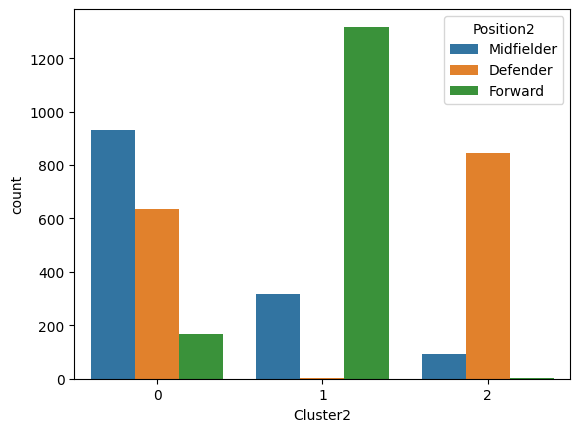

In [ ]:
sns.countplot(df_clusters2,x="Cluster2",hue="Position2")



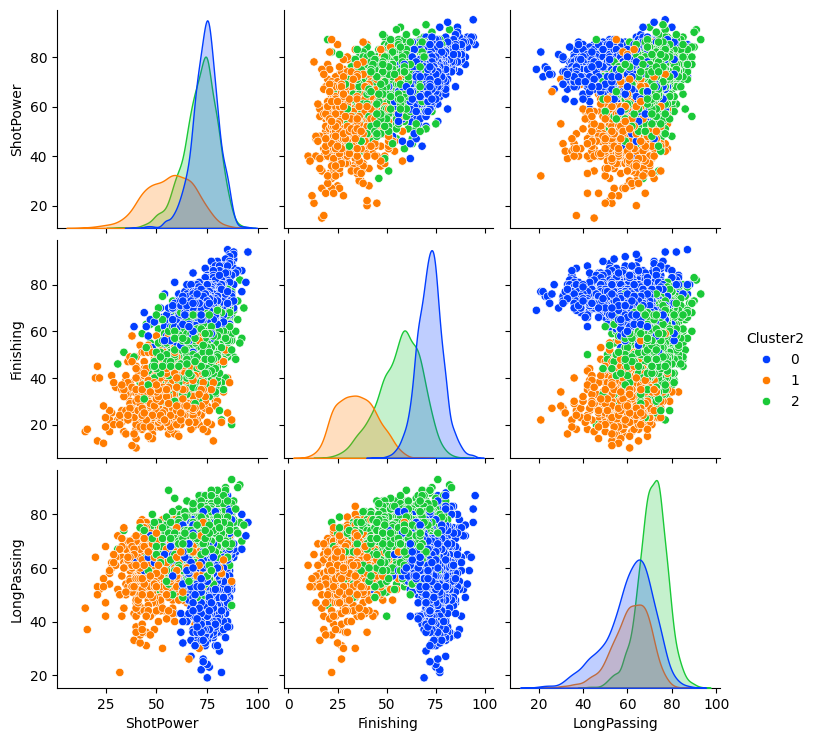

In [ ]:
data_temp = df_clusters2.loc[:,['Cluster2','ShotPower','Finishing','LongPassing']]


sns.pairplot(data_temp, hue="Cluster2",palette='bright')

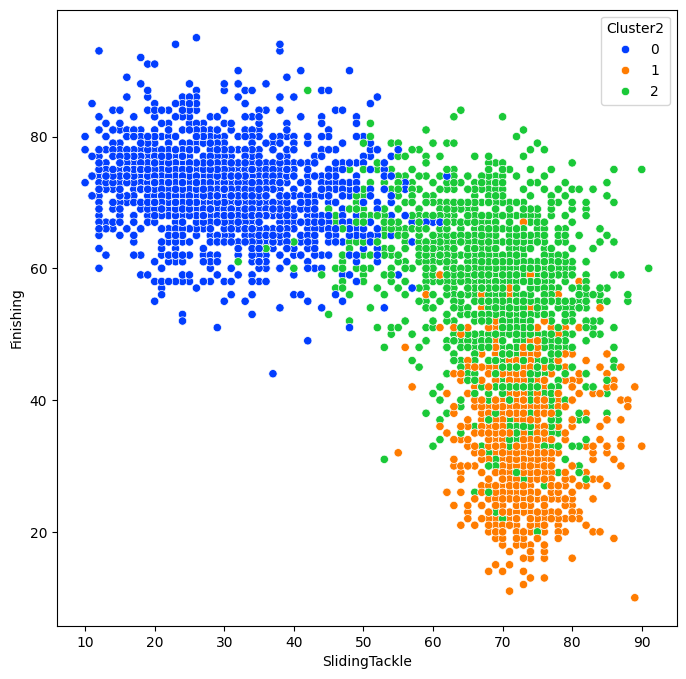

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='SlidingTackle', y='Finishing', hue='Cluster2', data=df_clusters2,palette='bright')
plt.show()

In [ ]:
#data=[]
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [ ]:
kmean_clusters = go.Scatter(x=df_skills2[skill_1], y=df_skills2[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills2.loc[bool_crack,skill_1], y=df_skills2.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

# 5.-Clustering-Mean-Shift

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio/bandwith (de cobertura para cálculo de media). (Ejercicio: Probar con varios)

In [ ]:
ms = MeanShift(bandwidth=1, bin_seeding=True)

ms.fit(df_skills)

clusters_ms = ms.labels_
cluster_centers_ms = ms.cluster_centers_

labels_unique = np.unique(clusters_ms)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

df_clusters['MeanShift'] = ms.labels_ #clusters_ms

print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Cantidad de clusters encontrados por Mean Shift : 4747
Kmeans encontró:  4 clusters, nosotros lo forzamos
Mean shift encontró  4747 clusters, según los hiperparámetros elegidos


In [ ]:
#en Jupyter:
#plot(fig)

In [ ]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters_ms.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
#En Colab
fig.show(renderer="colab")

**EVALUACIÓN, ANÁLISIS: Análisis exploratorio de los clusters, usando las clases/clusters asignadas por MeanShift**

-Cantidad de observaciones por Cluster

-Análisis descriptivo separando por Cluster

-Tabla de contingencia alguna categórica vs clusters

-Tabla de contingencia kmeans vs meanshift...
otras ideas?

# 6.-Clustering-Mean-Shift-subpoblación

In [ ]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]

In [ ]:
ms2 = MeanShift(bandwidth=2.1, bin_seeding=True)

ms2.fit(df_skills2)

clusters_ms2 = ms2.labels_
cluster_centers2 = ms2.cluster_centers_

labels_unique = np.unique(clusters_ms2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Numero de clusters encontrado por Mean Shift : 1


In [ ]:
bool_crack=df_n["Overall"] > 85
bool_no_crack=df_n["Overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[26]
print(skill_1,skill_2)

BallControl Marking


In [ ]:
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'Name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [ ]:
#En Colab
fig.show(renderer="colab")

In [ ]:
#En Jupyter
#iplot(fig)

# Dendogram

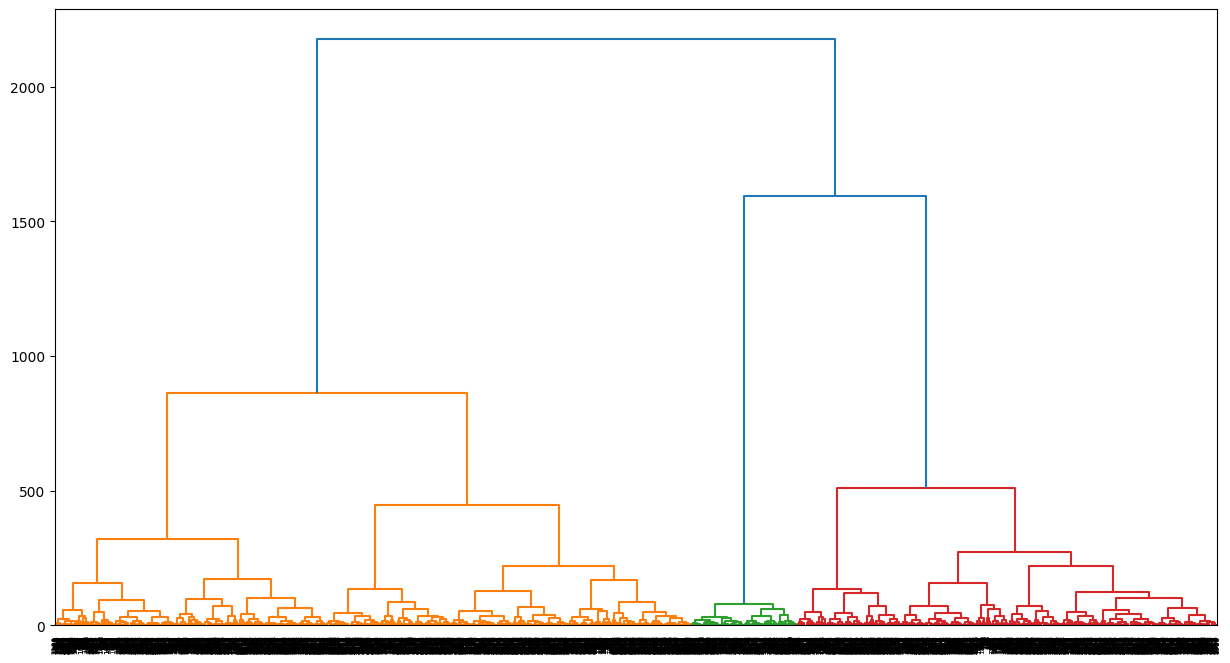

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')
# Fit the data into hierarchical clustering algorithm
dm = linkage(df_skills[['SlidingTackle', 'Finishing']], method='ward')

# Create a dendrogram
plt.figure(figsize=(15,8))
dendr = dendrogram(dm)
plt.show()

In [ ]:
# Assign cluster label to each row
df_clusters['Cluster3'] = fcluster(dm, 4, criterion = 'maxclust')


<Axes: xlabel='Cluster3', ylabel='count'>

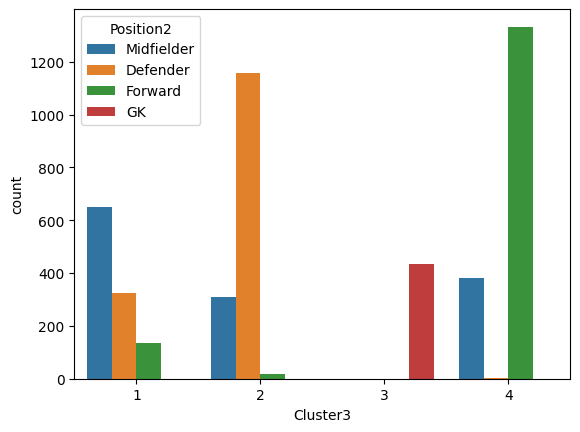

In [ ]:
sns.countplot(df_clusters,x="Cluster3",hue="Position2")


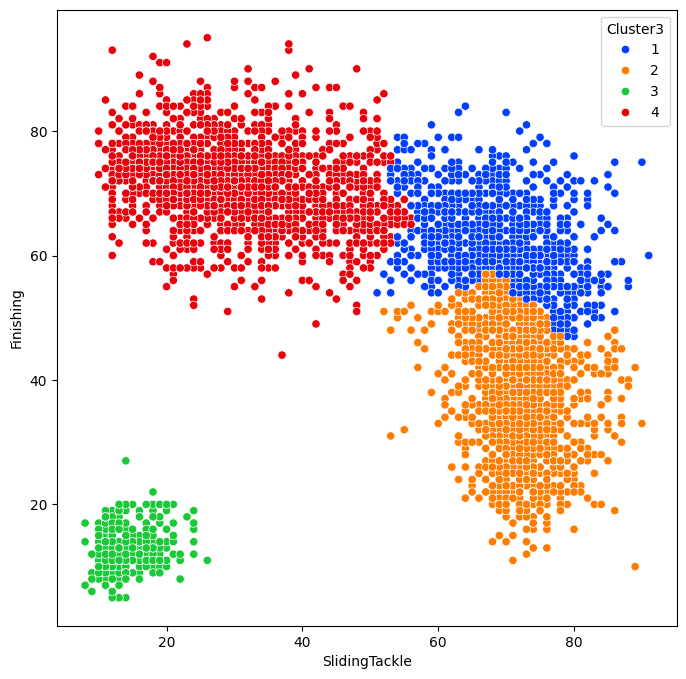

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='SlidingTackle', y='Finishing', hue='Cluster3', data=df_clusters,palette='bright')
plt.show()